In [ ]:
import torch
import matplotlib.pyplot as plt

In [144]:
import time

In [122]:
print(torch.__version__)

2.5.1


In [43]:
points = torch.tensor([[1,2], [3,4], [5,6]])
points[1:, 0] #all rows after the first, first column
points[2:, 1] #all rows after the second, second column- only one entry. 6
#points.shape

tensor([6])

In [44]:
points = torch.zeros(2,3)
points

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
#Example tensor that we might expect from an image- [channels, rows, columns]
img_t = torch.randn(3,5,5)
img_t[0] #R
img_t[1] #G
img_t[2] #B

tensor([[-2.3538, -1.3923, -1.1282, -2.3586,  0.0555],
        [-0.3133, -0.1028, -0.7182, -0.4969,  0.2671],
        [ 2.2092, -0.0409,  1.7905, -0.4240,  0.9849],
        [-0.8076, -1.3662, -0.5117, -0.3452, -0.9885],
        [-0.2870,  2.0360,  0.5162, -0.6286,  0.1478]])

In [46]:
#Img batch! [batch, channel, row, colum]
batch_t = torch.randn(2, 3, 5, 5)
batch_t[0][0]

tensor([[ 0.5006, -1.2501, -0.2773,  0.8128, -2.3660],
        [-0.5298,  0.6228, -1.5704, -0.0873,  0.2272],
        [ 1.4160,  0.5330, -1.0560,  0.2732,  0.1806],
        [ 0.2043,  2.3236,  2.2123, -1.4864,  2.1949],
        [-0.3786,  1.2157,  1.1916, -0.5246,  1.4528]])

In [47]:
#In batches, the channels are in dimension 1
#In single images, the channels are in dimension 0
#Either way, they are 3rd from the end, i.e. in position -3

img_gray_naive = img_t.mean(-3) #Mean over the 3rd from last (i.e. rgb) dimension
batch_gray_naive = batch_t.mean(-3)

#Img_gray naive will return a 5x5 tensor- 5 rows, 5 columns. The number therein will be the "gray value"
#batch_gray_naive returns 2x5x5 tensor- two images with their "gray" value
img_gray_naive, batch_gray_naive

(tensor([[-2.9075e-01, -5.2675e-01,  4.6761e-01, -4.2985e-01, -5.0401e-01],
         [ 2.5349e-01, -1.0263e+00, -3.8318e-02,  5.4191e-01, -8.2166e-02],
         [ 1.2039e+00,  7.4511e-01,  4.3496e-01,  6.1954e-02,  6.2730e-01],
         [-5.7429e-01,  6.7650e-02,  4.2046e-02, -8.2288e-01, -4.3171e-01],
         [ 4.4459e-01,  8.3897e-01, -1.5368e-01, -1.1578e-03,  1.3813e-01]]),
 tensor([[[-0.1969, -0.9613,  0.1971,  0.8441, -1.2041],
          [-0.0379,  0.6655, -0.0739, -0.0781,  0.0054],
          [-0.2723,  0.3422,  0.1041, -0.7682,  0.2391],
          [ 0.2425,  1.2912,  0.5904, -0.7433,  0.0397],
          [-0.3502,  0.2463,  0.7457, -0.4609,  0.2204]],
 
         [[ 0.1069, -0.2361,  0.0720, -0.3599, -0.1422],
          [-0.2923,  1.0428,  0.4500, -0.1811,  0.0207],
          [-0.2012, -0.3692, -0.2832, -0.3149, -0.0870],
          [ 0.5086,  0.2375,  0.2408, -0.7849,  0.1771],
          [ 0.1452,  0.5633, -0.5820,  1.0265,  0.7818]]]))

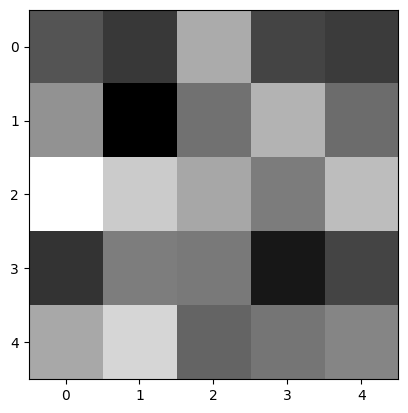

In [48]:
plt.imshow(img_gray_naive, cmap='gray')

In [53]:
weights = torch.tensor([0.2126, 0.7152, 0.0722]) #Weights has shape 3

#Unsqueezed_weights has shape (3,1,1)- applies multiplication to RBG dimension for each of the 5x5 pixels
unsqueezed_weights = weights.unsqueeze(-1).unsqueeze(-1) 

img_weights = (img_t * unsqueezed_weights)
batch_weights = (batch_t * unsqueezed_weights) #Multiplies R, G, B values by appropriate weight across all pixels in the two images
img_gray_weighted = img_weights.sum(-3)
batch_gray_weighted = batch_weights.sum(-3)


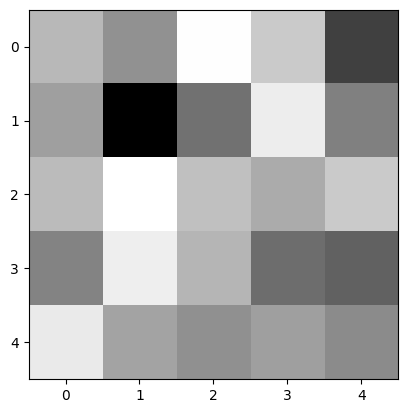

In [56]:
plt.imshow(img_gray_weighted, cmap='gray') #Bitmap image with the new weightings

In [ ]:
# Performing the same operation using the einsum function
img_gray_weighted_fancy = torch.einsum('...chw, c->...hw', img_t, weights) #Use ... to generalise to arbitrary number of leading dimensions

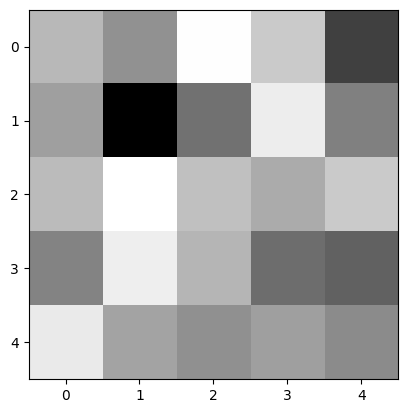

In [60]:
plt.imshow(img_gray_weighted_fancy, cmap='gray')

In [ ]:
#Using the einsum feature on the batch
batch_gray_weighted_fancy = torch.einsum('...chw, c->...hw', batch_t, weights)
#Keep every dimension other than 

In [67]:
batch_gray_weighted_fancy.shape, batch_gray_weighted_fancy

(torch.Size([2, 5, 5]),
 tensor([[[ 0.2390, -0.7722,  0.0685,  0.0177, -1.5741],
          [-0.1531,  0.5868,  1.0038,  0.1436, -0.0535],
          [-1.6050,  0.3852,  0.3344, -0.4731,  0.0804],
          [-0.4720,  0.9454, -1.1179, -0.2444, -1.1266],
          [-0.1279,  1.1317,  0.5227, -0.2862, -0.0406]],
 
         [[ 0.1871, -0.2527, -0.1051, -0.7100, -0.7797],
          [-0.2116,  1.0236,  1.0750, -0.6039,  0.9263],
          [-0.3205, -0.3121, -0.5218, -0.5900,  0.1401],
          [ 1.4706,  0.4928,  0.9690, -1.0503, -0.9425],
          [ 0.4442, -0.6074, -0.1077,  0.7895,  1.3262]]]))

In [68]:
weights_named = torch.tensor([0.2126, 0.7152, 0.0722], names = ['channels'])
weights_named

/var/folders/j5/qqf885v16ps2h__10kf0m2th0000gn/T/ipykernel_62045/2163324119.py:1: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/c10/core/TensorImpl.h:1931.)
  weights_named = torch.tensor([0.2126, 0.7152, 0.0722], names = ['channels'])


tensor([0.2126, 0.7152, 0.0722], names=('channels',))

In [73]:
img_named = img_t.refine_names(..., 'channels', 'rows', 'columns')
batch_named = batch_t.refine_names(..., 'channels', 'rows', 'columns')
print(img_named, img_named.shape, img_named.names)
print(batch_named, img_named.shape, batch_named.names)

tensor([[[ 0.9474, -0.3339,  0.8896, -0.0669, -0.0911],
         [ 1.2896, -0.5316,  1.6678,  0.8266, -0.1269],
         [ 1.4261,  0.6560, -1.4613,  0.3156,  0.1560],
         [-0.9419, -0.1040,  0.0926, -2.0444,  0.7107],
         [ 0.2071,  0.6592, -1.1623,  0.5873,  0.6967]],

        [[ 0.5342,  0.1460,  1.6415,  1.1359, -1.4765],
         [-0.2158, -2.4447, -1.0646,  1.2959, -0.3867],
         [-0.0235,  1.6203,  0.9757,  0.2943,  0.7410],
         [ 0.0266,  1.6731,  0.5453, -0.0791, -1.0173],
         [ 1.4137, -0.1783,  0.1850,  0.0378, -0.4301]],

        [[-2.3538, -1.3923, -1.1282, -2.3586,  0.0555],
         [-0.3133, -0.1028, -0.7182, -0.4969,  0.2671],
         [ 2.2092, -0.0409,  1.7905, -0.4240,  0.9849],
         [-0.8076, -1.3662, -0.5117, -0.3452, -0.9885],
         [-0.2870,  2.0360,  0.5162, -0.6286,  0.1478]]],
       names=('channels', 'rows', 'columns')) torch.Size([3, 5, 5]) ('channels', 'rows', 'columns')
tensor([[[[ 5.0062e-01, -1.2501e+00, -2.7732e-01,  8.1

In [76]:
weights_aligned = weights_named.align_as(img_named) #Permutes the weight tensor dimensions until aligned appropriately, and then adds in dimensions as necessary
weights_aligned, weights_aligned.shape, weights_aligned.names #Shape is (3,1,1) and has the same names as the img_named

(tensor([[[0.2126]],
 
         [[0.7152]],
 
         [[0.0722]]], names=('channels', 'rows', 'columns')),
 torch.Size([3, 1, 1]),
 ('channels', 'rows', 'columns'))

In [79]:
gray_named = (img_named * weights_aligned).sum('channels') #Performs the sum over colour channels after appropriate weighting
gray_named.shape, gray_named.names #Only has two dimensions, which are named rows and columns

(torch.Size([5, 5]), ('rows', 'columns'))

In [85]:
double_points = torch.ones(10, 2, dtype=torch.double)
short_points = torch.tensor([[1,2], [3,4]], dtype=torch.short)

double_points.dtype, short_points.dtype

(torch.float64, torch.int16)

In [ ]:
#Using casting instead to enforce the correct data type

double_points = torch.ones(10, 2).double()
short_points = torch.tensor([[1,2], [3,4]]).short()

double_points.dtype, short_points.dtype

(torch.float64, torch.int16)

In [89]:
points_64 = torch.rand(5, dtype=torch.double)
points_short = points_64.to(dtype=torch.short)
points_64 * points_short

tensor([0., 0., 0., 0., 0.], dtype=torch.float64)

In [92]:
#Transpose feature in torch
a = torch.randn(3,2)
a_t = torch.transpose(a, 0, 1) #Exchanges dim0 and dim1

a.shape, a_t.shape

(torch.Size([3, 2]), torch.Size([2, 3]))

In [99]:
# Zeroing method

a = torch.ones(2,3)
print(a)
print(a.zero_())

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [105]:
#Shape, offset, stride
a = torch.randn(3,3) 
#shape of the tensor is 3x3. Stride is (3,1), as 3 steps along storage takes you to the next row, and 1 step along storage takes you to the next column
print('Stride: ', a.stride())
print('Shape: ', a.shape)
print('Offset: ', a.storage_offset()) #How far along the storage object is the first element of the matrix stored?

Stride:  (3, 1)
Shape:  torch.Size([3, 3])
Offset:  0


In [124]:
#Need to use the clone method to make sure that we aren't accidentally modifying the original tensor
points = torch.tensor([[1,2], [3,4], [5,6]])
second_point = points[1]
second_point[0] = 10 #This will modify the original tensor
print(points)
print('Second Point Storage offset: ', second_point.storage_offset())

tensor([[ 1,  2],
        [10,  4],
        [ 5,  6]])
Second Point Storage offset:  2


In [125]:
points = torch.tensor([[1,2], [3,4], [5,6]])
second_point = points[1].clone() #second_point is now a separate tensor, i.e. a clone. Changing its values leaves the original tensor unaffected
second_point[0] = 10 #This will NOT modify the original tensor
print(points)
print('Second Point Storage offset: ', second_point.storage_offset())

tensor([[1, 2],
        [3, 4],
        [5, 6]])
Second Point Storage offset:  0


In [116]:
#Contiguous and non-contiguous tensors
a = torch.tensor([[1,2], [3,4], [5,6]])
b = a.T #Accessing b's storage element in order will not return the original tensor b
print(a.is_contiguous(), b.is_contiguous())

#Storage objects for the two tensors will be the same
print(a.storage())
print(b.storage())
a, b

True False
 1
 2
 3
 4
 5
 6
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 6]
 1
 2
 3
 4
 5
 6
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 6]


(tensor([[1, 2],
         [3, 4],
         [5, 6]]),
 tensor([[1, 3, 5],
         [2, 4, 6]]))

In [117]:
a.stride(), b.stride()

((2, 1), (1, 2))

In [126]:
b_cont = b.contiguous()
b_cont.storage(), b_cont.is_contiguous() #New storage object created such that this tensor is in fact contiguous

( 1
  3
  5
  2
  4
  6
 [torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 6],
 True)

In [145]:
torch.manual_seed(19823)

points_gpu = torch.randn(400, 400, device='mps') #Metal Performance Shaders
points_gpu.device 

points = torch.randn(400, 400)
points.device

device(type='cpu')

In [163]:
#Comparing the computation time

ti = time.time()
points_cpu_square = points * points
tf = time.time()
dt_cpu = tf-ti

ti = time.time()
points_gpu_square = points_gpu * points_gpu
tf = time.time()
dt_gpu = tf-ti

print('CPU computation time: ', dt_cpu)
print('GPU computation time: ', dt_gpu)

CPU computation time:  0.0006060600280761719
GPU computation time:  0.0010759830474853516


In [ ]:
#Can also save a tensor directly into a file
torch.save(points, 'points.t')